In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
ud=pd.read_json('ultimate_data_challenge.json')

In [3]:
ud.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
ud.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [5]:
ud['city']=ud.city.str.replace("King's Landing",'Gotham')
ud.city=ud.city.str.replace('Winterfell','Metropolis')

In [6]:
ud=ud.set_index('city')
ud1=ud.transpose()
ud1=ud1.drop('Astapor',axis=1)

In [7]:
ud1=ud1.transpose().reset_index()
ud1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,Gotham,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Gotham,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
2,Metropolis,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
3,Metropolis,2,2014-01-09,3.5,1.0,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
4,Metropolis,2,2014-01-28,5.0,1.0,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0


In [50]:
ud1.signup_date=pd.to_datetime(ud1.signup_date)

In [45]:
ud1.city.value_counts()

Metropolis    23336
Gotham        10130
Name: city, dtype: int64

In [46]:
ud1.ultimate_black_user.value_counts()

False    21089
True     12377
Name: ultimate_black_user, dtype: int64

In [47]:
black=ud1[ud1.ultimate_black_user==True]

Text(0.5, 1.0, 'ultimate black users phone type')

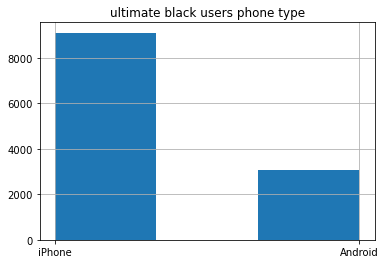

In [48]:
black.phone.hist(bins=3)
plt.title('ultimate black users phone type')

In [49]:
black.avg_dist.mean()

6.400866930597106

In [51]:
non_black=ud1[ud1.ultimate_black_user==False]

In [52]:
non_black.avg_dist.mean()

5.7315301816112685

<AxesSubplot:>

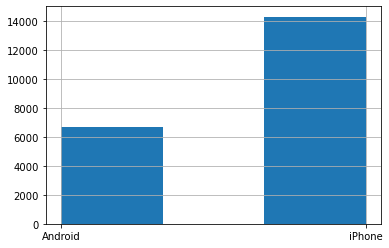

In [53]:
non_black.phone.hist(bins=3)

In [54]:
black.avg_rating_by_driver.mean()

4.776066715245817

In [55]:
non_black.avg_rating_by_driver.mean()

4.763131794773982

In [56]:
black.avg_surge.mean()

1.0521782338208066

In [58]:
non_black.avg_surge.mean()

1.0788007966238364

<AxesSubplot:>

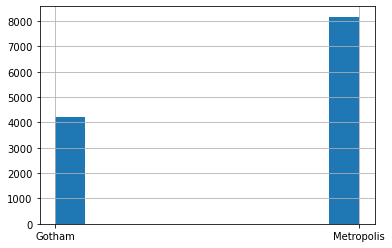

In [59]:
black.city.hist()

In [82]:
black.city.value_counts()

Metropolis    8171
Gotham        4206
Name: city, dtype: int64

<AxesSubplot:>

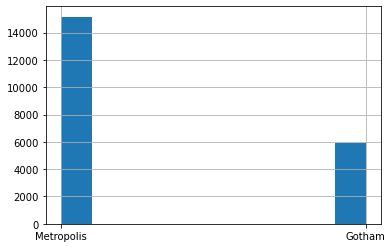

In [60]:
non_black.city.hist()

In [86]:
non_black.city.value_counts()

Metropolis    15165
Gotham         5924
Name: city, dtype: int64

In [20]:
Gotham=ud1[ud1.city=='Gotham']
Gotham.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [27]:
Gotham.avg_surge.mean()

1.0707068114511413

In [28]:
Gotham.avg_surge.median()

1.0

<AxesSubplot:>

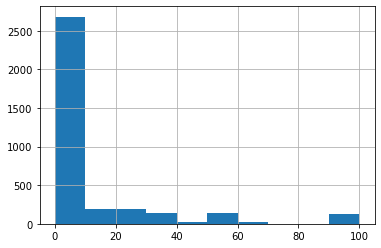

In [31]:
trips0=Gotham.trips_in_first_30_days<1
Gotham[trips0].surge_pct.sort_values().hist()

<AxesSubplot:>

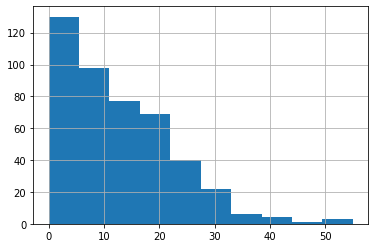

In [22]:
trips1=Gotham.trips_in_first_30_days>10
Gotham[trips1].surge_pct.sort_values().hist()

In [32]:
trips0.value_counts()

False    6598
True     3532
Name: trips_in_first_30_days, dtype: int64

In [80]:
Gotham[trips1].ultimate_black_user.value_counts()

True     287
False    163
Name: ultimate_black_user, dtype: int64

In [81]:
Gotham[trips0].ultimate_black_user.value_counts()

False    5729
True     3871
Name: ultimate_black_user, dtype: int64

black users had taken 10 more rides in the first 30 days 0.76 times more than non black riders in Gotham. 
in Gotham black users are 4206 and non black users 5924 
450 users taken less than 10 trips in their first 30 days in Gotham


In [92]:
Gotham.weekday_pct.mean()

63.232290227048516

In [93]:
Gotham.weekday_pct.median()

66.7

In [8]:
metro=ud1[ud1.city=='Metropolis']
metro.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [96]:
Metro.weekday_pct.mean()

60.31893640726764

In [97]:
Metro.weekday_pct.median()

66.7

In [109]:
more_than50=metro.weekday_pct>50
more_than50.sum()

13922

In [110]:
less_than50=metro.weekday_pct<50
less_than50.sum()

7489

In [11]:
ud1.last_trip_date=pd.to_datetime(ud1.last_trip_date)

In [117]:
ud1.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [142]:
today="07-01-2014"
today=pd.to_datetime(today)
today

Timestamp('2014-07-01 00:00:00')

In [138]:
activity_period=ud1.last_trip_date-ud1.signup_date

In [52]:
activity_period.mean()

Timedelta('97 days 23:41:06.622841092')

In [53]:
activity_period.median()

Timedelta('121 days 00:00:00')

In [54]:
activity_period.describe()

count                         33466
mean     97 days 23:41:06.622841092
std      62 days 12:55:03.138308467
min                 0 days 00:00:00
25%                34 days 00:00:00
50%               121 days 00:00:00
75%               153 days 00:00:00
max               181 days 00:00:00
dtype: object

In [139]:
activity_period=activity_period.astype('str')
activity_period.head()

0    143 days
1    170 days
2     47 days
3    148 days
4      1 days
dtype: object

In [140]:
activity_period=activity_period.str.split(expand=True)

In [141]:
activity_period=activity_period.drop(1,axis=1)

In [26]:
metro.avg_surge.mean()

1.0681942063764231

In [29]:
metro.avg_surge.median()

1.0

to increase the customer base in Gotham it is essential to deliver discounted rates Via an increase of number of drivers, the propsed idea will be that drivers will get full toll reimbursment if they spend an hour in gotham and performed at least one trip in Gotham after the drop off if they were on a trip, or stay in gotham for at least 4 hours if not on trip between cities. 

the key measure in this expierment is a relief in surge time charges for Gotham's residents. after all to increase the number of customers we need to convince them to use us. 
so the expectation is to see a drop in surge times and surge time charges. 
statistical tests will be performed to ensure the observation was correct is a constant monitoring for regular statistical descriptors with an expectation of mean and median drop in surge time charges.
the goal to drop avg surge in gotham to 1.03, which should increase Metro's surge to 1.8



In [147]:
inactivity_period=today-ud1.last_trip_date
inactivity_period=inactivity_period.astype('str')
inactivity_period=inactivity_period.str.split(expand=True)
inactivity_period=inactivity_period.drop(1,axis=1)
inactivity_period=inactivity_period.astype(int)

In [150]:
df1=pd.merge(ud1,activity_period,left_index=True, right_index=True)
df=pd.merge(df1,inactivity_period,left_index=True, right_index=True)

In [151]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,0_x,0_y
0,Gotham,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,14
1,Gotham,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,2
2,Metropolis,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,108
3,Metropolis,2,2014-01-09,3.5,1.0,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,148,25
4,Metropolis,2,2014-01-28,5.0,1.0,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,1,153


In [154]:
df=df.rename(columns={'0_x':"activity_length"})

In [155]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,activity_length,last_trip
0,Gotham,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,14
1,Gotham,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,2
2,Metropolis,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,108
3,Metropolis,2,2014-01-09,3.5,1.0,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,148,25
4,Metropolis,2,2014-01-28,5.0,1.0,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,1,153


In [156]:
df['last_trip']=df.last_trip.astype('int')
df['activity_length']=df['activity_length'].astype('int')

In [157]:
df['churn']=df.last_trip<150

In [158]:
df.churn.value_counts()

True     26846
False     6620
Name: churn, dtype: int64

In [159]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,activity_length,last_trip,churn
0,Gotham,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,14,True
1,Gotham,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,2,True
2,Metropolis,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,108,True
3,Metropolis,2,2014-01-09,3.5,1.0,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,148,25,True
4,Metropolis,2,2014-01-28,5.0,1.0,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,1,153,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33461,Metropolis,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.0,5.0,7,151,False
33462,Metropolis,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0,172,2,True
33463,Gotham,1,2014-01-18,1.0,1.0,2014-01-19,iPhone,0.0,False,0.0,7.58,5.0,1,163,False
33464,Gotham,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,131,26,True


# Modeling 

In [160]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [161]:
df['city']=labelencoder.fit_transform(df.city)
df['phone']=labelencoder.fit_transform(df.phone)

In [162]:
df=df.drop(columns=['last_trip_date','signup_date'])

In [163]:
df.avg_rating_of_driver.mean()

4.5875243526619895

<AxesSubplot:>

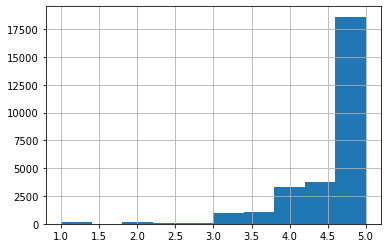

In [164]:
df.avg_rating_of_driver.hist()

In [165]:
df.avg_rating_of_driver.median()

4.9

In [166]:
df.avg_rating_of_driver=df.avg_rating_of_driver.fillna(np.median(df.avg_rating_of_driver))

In [167]:
df.avg_rating_of_driver.isna().value_counts()

False    33466
Name: avg_rating_of_driver, dtype: int64

<AxesSubplot:>

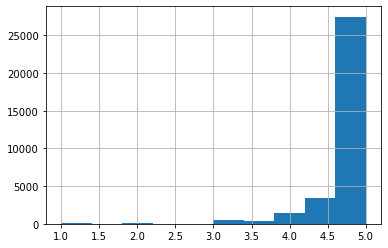

In [168]:
df.avg_rating_by_driver.hist()

In [169]:
df.avg_rating_by_driver=df.avg_rating_by_driver.fillna(np.median(df.avg_rating_by_driver))

In [170]:
df.phone.value_counts()

1    23413
0     9778
2      275
Name: phone, dtype: int64

In [171]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [172]:
from sklearn.model_selection import train_test_split
X=df.drop('churn',axis=1)
y=df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)

In [173]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [174]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score,classification_report

In [175]:
rf=rf()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1333
        True       1.00      1.00      1.00      5361

    accuracy                           1.00      6694
   macro avg       1.00      1.00      1.00      6694
weighted avg       1.00      1.00      1.00      6694



some measures were taken to balance the data including droping the churn period from 6 months to 5 months , bootstrapping wouldn't have helped nor decreasing data size. 

In [176]:
rf. feature_importances_

array([1.71541517e-03, 3.92415865e-02, 6.43579256e-04, 2.95068928e-03,
       6.30227697e-04, 5.87503671e-03, 2.85841242e-04, 1.55933974e-02,
       2.47056315e-03, 1.96753704e-02, 3.18715222e-01, 5.92203071e-01])

the most important feature in predicting chrun is the length on inactivity, and length of active profile